##  **load data**

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data
df = pd.read_excel("imbalanced_dataset.xlsx")

In [3]:
# head of the data
print(df.head())

       V1     V2     V3    V4    V5     V6 objective
0  178.57  37.12   3037   391  3.41   4243  positive
1  146.04  51.03   1821   115  4.72  14254  positive
2  161.80  49.99   6029   746  6.34   6243  positive
3  127.83  72.42   7566   573  6.50  14044  positive
4  113.11  78.59  10734  1775  8.79   2918  positive


In [4]:
# shape of the data
print(df.shape)

(3900, 7)


In [5]:
# value counts of the target variable
print(df['objective'].value_counts())

objective
negative    3831
positive      69
Name: count, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop('objective', axis=1)
y = df['objective']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=2700,
                                                    test_size=1200,
                                                    stratify=y,
                                                    random_state=1)

# Print the shapes to verify
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nClass distribution in training set:")
print(y_train.value_counts())
print("\nClass distribution in test set:")
print(y_test.value_counts())

Training set shape: (2700, 6)
Test set shape: (1200, 6)

Class distribution in training set:
objective
negative    2652
positive      48
Name: count, dtype: int64

Class distribution in test set:
objective
negative    1179
positive      21
Name: count, dtype: int64


In [7]:
# frequency of the target variable
print(df['objective'].value_counts(normalize=True))

objective
negative    0.982308
positive    0.017692
Name: proportion, dtype: float64


## **Données représentatives**

In [8]:
from sklearn.linear_model import LogisticRegression

# Create and train the logistic regression model
modele1 = LogisticRegression(random_state=1, solver='liblinear')
modele1.fit(X_train, y_train)

# Print the model score on training data
print("Training score:", modele1.score(X_train, y_train))
# Print the model score on test data
print("Test score:", modele1.score(X_test, y_test))

Training score: 0.9829629629629629
Test score: 0.9816666666666667


In [9]:
# calculate of predicted probabilities
y_pred_proba = modele1.predict_proba(X_test)[:,1]
# mean of predicted probabilities
print(y_pred_proba.mean())

0.016097382237914643


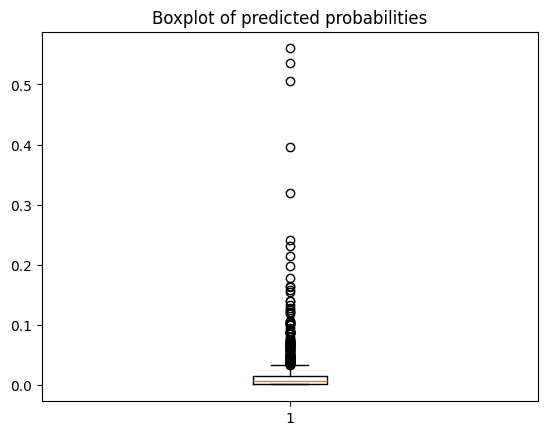

In [10]:
# boxplot of predicted probabilities
plt.boxplot(y_pred_proba)
plt.title("Boxplot of predicted probabilities")
plt.show()

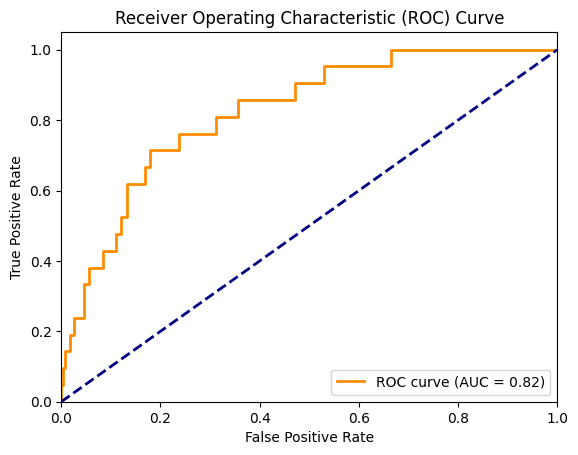

In [11]:
from sklearn.metrics import roc_curve, auc

# Calculate TPR and FPR
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='positive')

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [12]:
# Make predictions on the test set
y_pred = modele1.predict(X_test)

# Count unique values in predictions
values, counts = np.unique(y_pred, return_counts=True)

# Create a dictionary to show the counts
prediction_counts = dict(zip(values, counts))

print("Prediction counts:")
for class_label, count in prediction_counts.items():
    print(f"{class_label}: {count}")

Prediction counts:
negative: 1197
positive: 3


In [13]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, pos_label='positive')

# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nF1-Score:", round(f1, 2))

# Print detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1177    2]
 [  20    1]]

F1-Score: 0.08

Detailed Classification Report:
              precision    recall  f1-score   support

    negative       0.98      1.00      0.99      1179
    positive       0.33      0.05      0.08        21

    accuracy                           0.98      1200
   macro avg       0.66      0.52      0.54      1200
weighted avg       0.97      0.98      0.97      1200



## **Données équilibrées**

In [14]:
# First, separate positive and negative samples from X_train and y_train
X_train_pos = X_train[y_train == 'positive']
y_train_pos = y_train[y_train == 'positive']

X_train_neg = X_train[y_train == 'negative']
y_train_neg = y_train[y_train == 'negative']

# Get the number of positive samples
n_positive = len(y_train_pos)

# Randomly sample the same number of negative samples
X_train_neg_sampled, _, y_train_neg_sampled, _ = train_test_split(
    X_train_neg, 
    y_train_neg,
    train_size=n_positive,
    random_state=1
)

# Combine the positive and sampled negative data
X_train_balanced = pd.concat([X_train_pos, X_train_neg_sampled])
y_train_balanced = pd.concat([y_train_pos, y_train_neg_sampled])

# Print the new class distribution
print("Balanced training set distribution:")
print(y_train_balanced.value_counts())

Balanced training set distribution:
objective
positive    48
negative    48
Name: count, dtype: int64


In [15]:
# buil the model2 on balanced data
modele2 = LogisticRegression(random_state=1, solver='liblinear')
modele2.fit(X_train_balanced, y_train_balanced)


LogisticRegression(random_state=1, solver='liblinear')

In [16]:
# Calculate predicted probabilities for the balanced model
y_pred_proba_balanced = modele2.predict_proba(X_test)[:,1]

# Calculate and print the mean probability for the positive class
print("Mean probability for positive class:", round(y_pred_proba_balanced.mean(), 4))

Mean probability for positive class: 0.2939


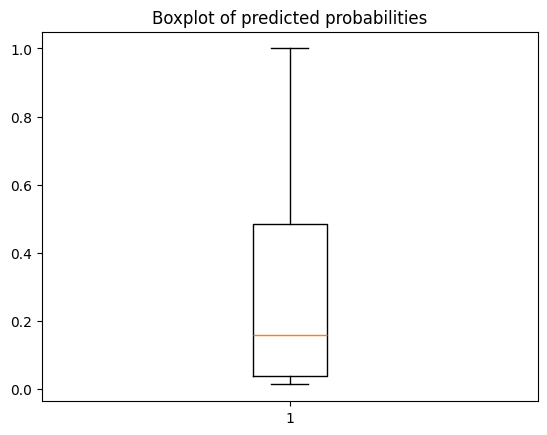

In [17]:
# boxplot of predicted probabilities
plt.boxplot(y_pred_proba_balanced)
plt.title("Boxplot of predicted probabilities")
plt.show()

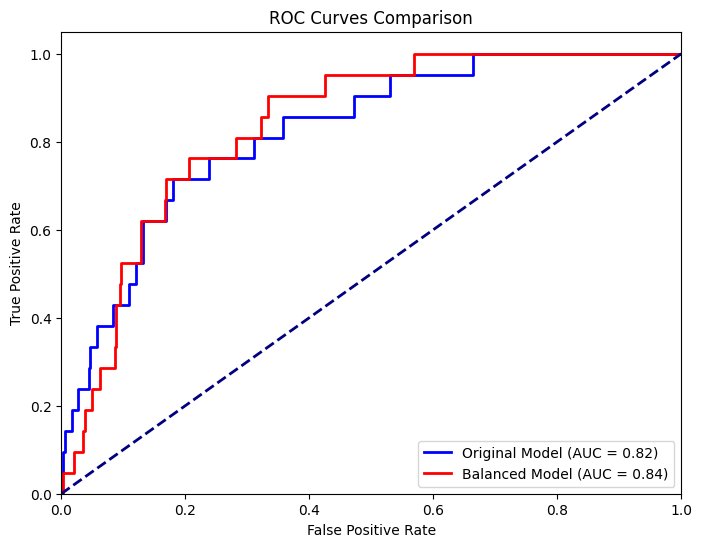


AUC Scores:
Original Model: 0.824
Balanced Model: 0.838


In [18]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve metrics for modele2
fpr_balanced, tpr_balanced, _ = roc_curve(y_test, y_pred_proba_balanced, pos_label='positive')
roc_auc_balanced = auc(fpr_balanced, tpr_balanced)

# Plot ROC curves for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Original Model (AUC = {roc_auc:.2f})')
plt.plot(fpr_balanced, tpr_balanced, color='red', lw=2, label=f'Balanced Model (AUC = {roc_auc_balanced:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.show()

print("\nAUC Scores:")
print(f"Original Model: {roc_auc:.3f}")
print(f"Balanced Model: {roc_auc_balanced:.3f}")

In [19]:
# Make predictions on the test set using the balanced model
y_pred_balanced = modele2.predict(X_test)

# Count unique values in predictions
values_balanced, counts_balanced = np.unique(y_pred_balanced, return_counts=True)
prediction_counts_balanced = dict(zip(values_balanced, counts_balanced))

print("Prediction counts for balanced model:")
for class_label, count in prediction_counts_balanced.items():
    print(f"{class_label}: {count}")

Prediction counts for balanced model:
negative: 907
positive: 293


## **Données représentatives - ajustement du seuil d’affectation**

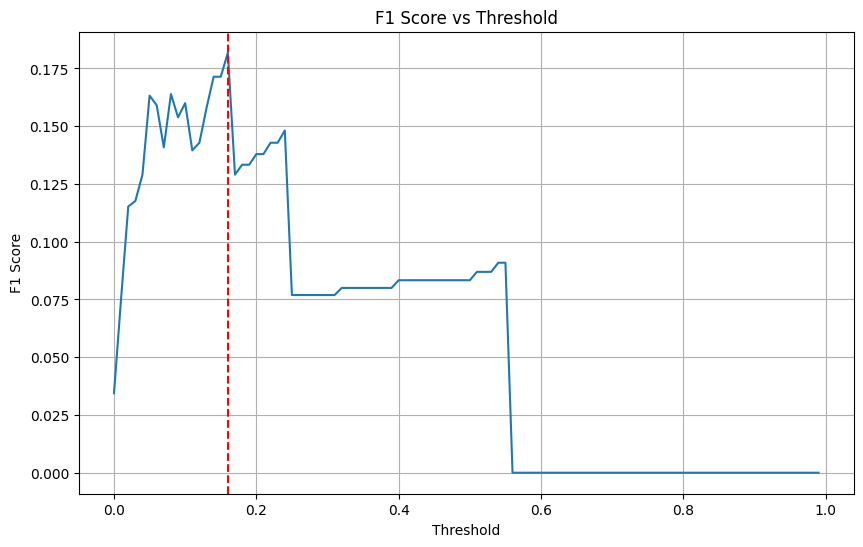

Optimal threshold: 0.160
Best F1 score: 0.182


In [20]:
from sklearn.metrics import f1_score
import numpy as np

# Create array of thresholds to test
thresholds = np.arange(0, 1, 0.01)

# Initialize lists to store results
f1_scores = []
thresholds_list = []

# Calculate F1 score for each threshold
for threshold in thresholds:
    # Convert probabilities to predictions based on threshold
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    # Convert numeric predictions to labels
    y_pred_labels = np.where(y_pred_threshold == 1, 'positive', 'negative')
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred_labels, pos_label='positive')
    f1_scores.append(f1)
    thresholds_list.append(threshold)

# Find optimal threshold
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds_list[optimal_idx]
best_f1 = f1_scores[optimal_idx]

# Plot F1 scores vs thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds_list, f1_scores)
plt.axvline(x=optimal_threshold, color='r', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.grid(True)
plt.show()

print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"Best F1 score: {best_f1:.3f}")

In [21]:
# The optimal threshold was already found in cell 23
print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"Best F1 score: {best_f1:.3f}")

# Apply the optimal threshold to get predictions
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
y_pred_labels_optimal = np.where(y_pred_optimal == 1, 'positive', 'negative')

# Calculate and print confusion matrix with optimal threshold
conf_matrix_optimal = confusion_matrix(y_test, y_pred_labels_optimal)
print("\nConfusion Matrix with optimal threshold:")
print(conf_matrix_optimal)

# Print classification report with optimal threshold
print("\nClassification Report with optimal threshold:")
print(classification_report(y_test, y_pred_labels_optimal))

Optimal threshold: 0.160
Best F1 score: 0.182

Confusion Matrix with optimal threshold:
[[1170    9]
 [  18    3]]

Classification Report with optimal threshold:
              precision    recall  f1-score   support

    negative       0.98      0.99      0.99      1179
    positive       0.25      0.14      0.18        21

    accuracy                           0.98      1200
   macro avg       0.62      0.57      0.59      1200
weighted avg       0.97      0.98      0.97      1200



In [22]:
# Create predictions using the optimal threshold
y_pred_with_new_threshold = (y_pred_proba >= optimal_threshold).astype(int)
y_pred_labels_with_new_threshold = np.where(y_pred_with_new_threshold == 1, 'positive', 'negative')

# Count the predictions
unique_values, counts = np.unique(y_pred_labels_with_new_threshold, return_counts=True)
prediction_counts = dict(zip(unique_values, counts))

# Print the results
print("Prediction counts with optimal threshold (0.16):")
for class_label, count in prediction_counts.items():
    print(f"{class_label}: {count}")

Prediction counts with optimal threshold (0.16):
negative: 1188
positive: 12


In [23]:
from sklearn.metrics import confusion_matrix, f1_score

# For the original model (modele1)
conf_matrix1 = confusion_matrix(y_test, y_pred)
f1_score1 = f1_score(y_test, y_pred, pos_label='positive')

# For the balanced model (modele2)
conf_matrix2 = confusion_matrix(y_test, y_pred_balanced)
f1_score2 = f1_score(y_test, y_pred_balanced, pos_label='positive')

# Print results
print("Original Model (modele1):")
print("Confusion Matrix:")
print(conf_matrix1)
print(f"F1-Score: {f1_score1:.3f}")

print("\nBalanced Model (modele2):")
print("Confusion Matrix:")
print(conf_matrix2)
print(f"F1-Score: {f1_score2:.3f}")

# For the optimal threshold model
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
y_pred_labels_optimal = np.where(y_pred_optimal == 1, 'positive', 'negative')
conf_matrix_opt = confusion_matrix(y_test, y_pred_labels_optimal)
f1_score_opt = f1_score(y_test, y_pred_labels_optimal, pos_label='positive')

print("\nOptimal Threshold Model (threshold = 0.16):")
print("Confusion Matrix:")
print(conf_matrix_opt)
print(f"F1-Score: {f1_score_opt:.3f}")

Original Model (modele1):
Confusion Matrix:
[[1177    2]
 [  20    1]]
F1-Score: 0.083

Balanced Model (modele2):
Confusion Matrix:
[[902 277]
 [  5  16]]
F1-Score: 0.102

Optimal Threshold Model (threshold = 0.16):
Confusion Matrix:
[[1170    9]
 [  18    3]]
F1-Score: 0.182


In [ ]:
# Print summary of all three approaches
print("Summary of Model Performance:\n")

print("1. Original Model (Default threshold = 0.5):")
print(f"F1-Score: {f1_score1:.3f}")
print("Predictions distribution:")
print("Negative:", prediction_counts['negative'])
print("Positive:", prediction_counts['positive'])
print("\n2. Balanced Training Model:")
print(f"F1-Score: {f1_score2:.3f}")
print("Predictions distribution:")
print("Negative:", prediction_counts_balanced['negative'])
print("Positive:", prediction_counts_balanced['positive'])
print("\n3. Optimal Threshold Model (threshold = 0.16):")
print(f"F1-Score: {f1_score_opt:.3f}")
print("Predictions distribution:")
print("Negative:", conf_matrix_opt[0,0] + conf_matrix_opt[0,1])
print("Positive:", conf_matrix_opt[1,0] + conf_matrix_opt[1,1])

print("\nConclusions:")
print("- The optimal threshold approach (0.16) gives the best F1-score of", round(f1_score_opt, 3))
print("- The balanced training approach improved prediction of minority class")
print("- ROC AUC scores show both balanced (0.838) and optimal threshold (0.824) approaches")
print("  perform better than the original model")